In [1]:
import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

## SIGMOID demo

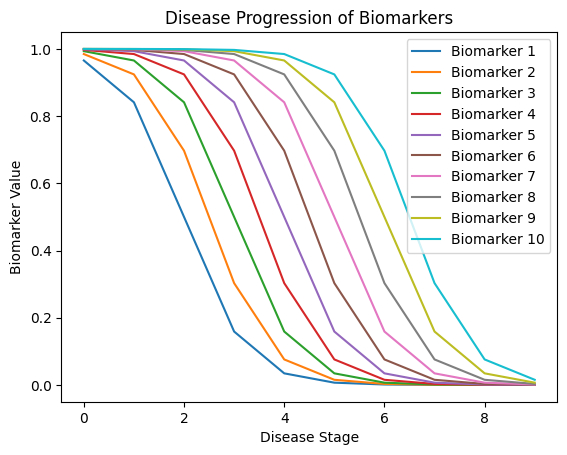

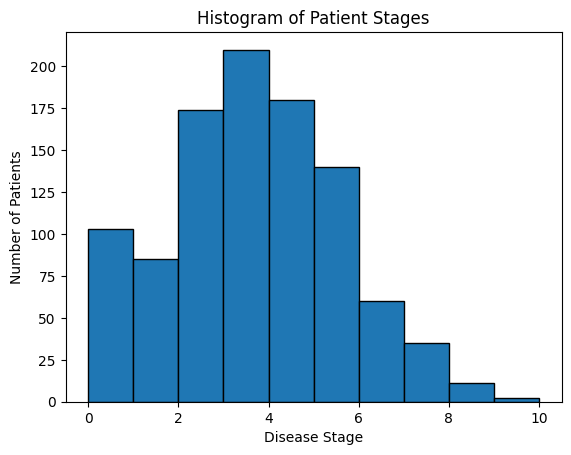

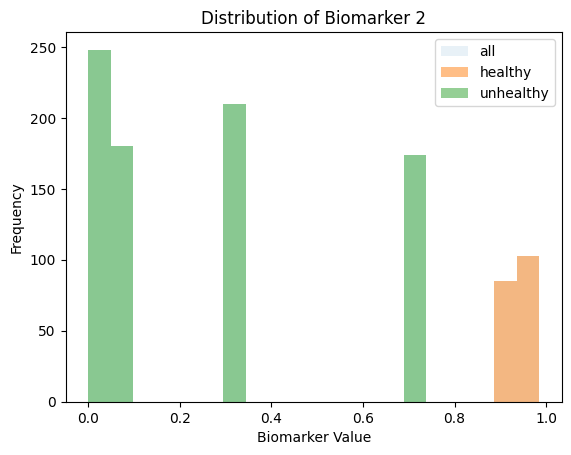

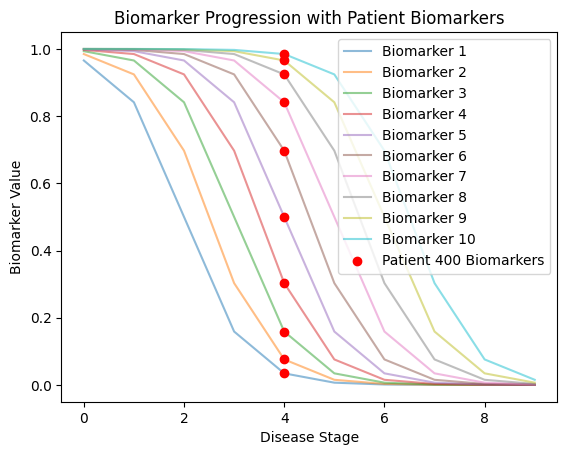

In [2]:
# model parameters
n_biomarkers = 10
n_stages = 10
model_type = 'sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 2.0, 'c': 0.6},
    1: {'s': 2.5, 'c': 0.6},
    2: {'s': 3.0, 'c': 0.6},
    3: {'s': 3.5, 'c': 0.6},
    4: {'s': 4.0, 'c': 0.6},
    5: {'s': 4.5, 'c': 0.6},
    6: {'s': 5.0, 'c': 0.6},
    7: {'s': 5.5, 'c': 0.6},
    8: {'s': 6.0, 'c': 0.6},
    9: {'s': 6.5, 'c': 0.6},
}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=False, noise_std=0, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
# TODO: set proper xlim based on number of stages 
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=1)
sample_generator.plot_patient_biomarkers(patient_index=400)

In [3]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# Print orders
analyzer.print_orders()

100%|██████████| 500000/500000 [02:18<00:00, 3598.99it/s]


Spearman's rho values: -0.2727272727272727


100%|██████████| 500000/500000 [02:15<00:00, 3691.41it/s]

First 10 MCMC sampled orders: [array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1]), array([2, 3, 4, 5, 6, 7, 8, 9, 1, 0]), array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1]), array([2, 3, 4, 5, 6, 7, 8, 9, 1, 0]), array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1]), array([2, 3, 4, 5, 6, 7, 8, 9, 1, 0]), array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1]), array([2, 3, 4, 5, 6, 7, 8, 9, 1, 0]), array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1]), array([2, 3, 4, 5, 6, 7, 8, 9, 1, 0])]


### TRANSITION MATRIX demo

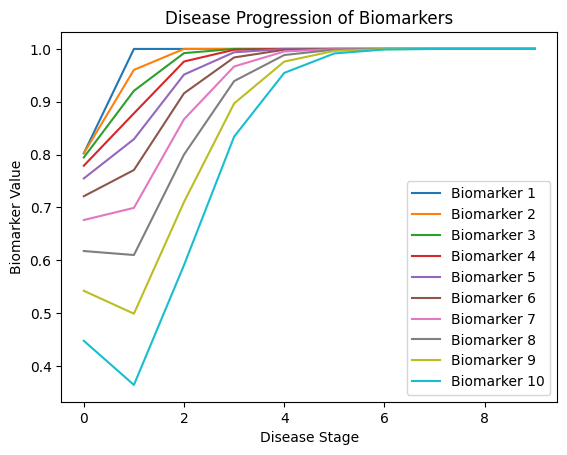

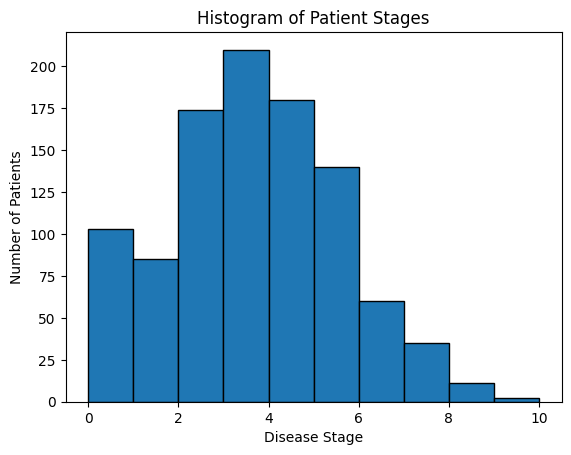

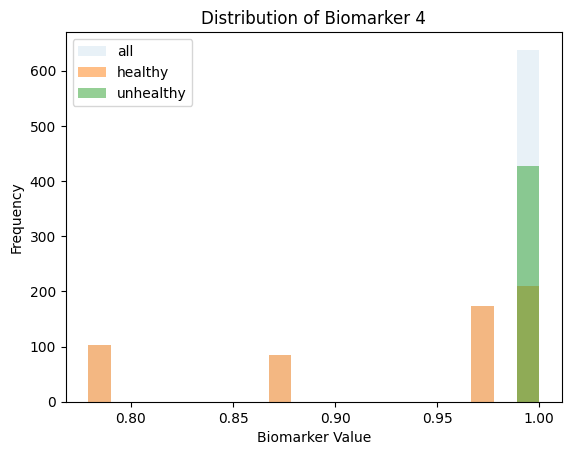

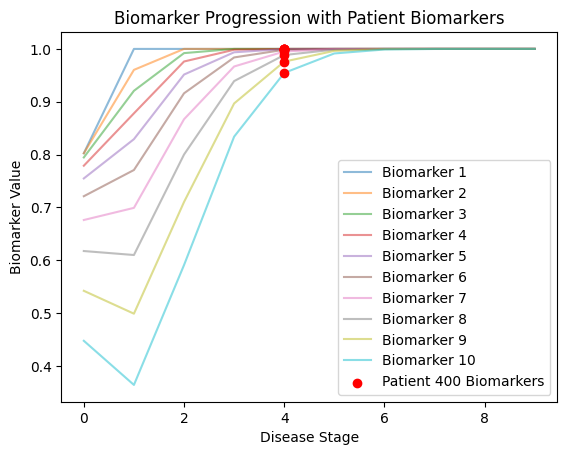

In [32]:
# specify model parameters
n_biomarkers = 10
n_stages = 10
model_type = 'transition_matrix'
biomarkers_params_transition = {'coeff': 2e-1}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_transition)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=False, noise_std=0, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plotting methods
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index = 3, healthy_stage_threshold=3)
sample_generator.plot_patient_biomarkers(patient_index=400)


In [4]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

100%|██████████| 500000/500000 [02:11<00:00, 3798.94it/s]

Greedy Ascent Result: [9 8 7 6 5 4 2 1 0 3]
First 10 MCMC sampled orders: [array([9, 8, 7, 6, 5, 4, 3, 1, 0, 2]), array([9, 8, 7, 6, 5, 4, 2, 1, 0, 3]), array([9, 8, 7, 5, 6, 4, 2, 1, 0, 3]), array([9, 8, 7, 6, 5, 4, 2, 1, 0, 3]), array([9, 8, 7, 5, 6, 4, 2, 1, 0, 3]), array([9, 8, 7, 5, 6, 4, 3, 1, 0, 2]), array([9, 8, 7, 5, 6, 4, 2, 1, 0, 3]), array([9, 8, 7, 6, 5, 4, 2, 1, 0, 3]), array([9, 8, 7, 6, 5, 4, 3, 1, 0, 2]), array([9, 8, 7, 6, 5, 4, 2, 1, 0, 3])]
Spearman's rho values: [-0.9636363636363635, -0.9272727272727272, -0.9151515151515152, -0.9272727272727272, -0.9151515151515152, -0.9515151515151514, -0.9151515151515152, -0.9272727272727272, -0.9636363636363635, -0.9272727272727272]
Spearman's rho values: -0.9636363636363635


## ODE demo

In [ ]:
# model parameters
n_biomarkers = 10
n_stages = 50
model_type = 'ode'
biomarkers_params_ode = {
    'connectivity_matrix': generate_transition_matrix(n_biomarkers, 0.1),
    'y_init': np.array([1.0] * n_biomarkers),
    't_span': (0, 50),
    'n_steps': n_stages
}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_ode)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=False, noise_std=0, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plotting methods
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=0, threshold=0.5)
sample_generator.plot_patient_biomarkers(patient_index=400)

In [ ]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
analyzer.print_orders(orders)